#1. Data Understanding and EDA

Loading and Inspecting Data

In [46]:
import pandas as pd

data=pd.read_csv("stock_price.csv")
data.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [2]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())



日付け      0
終値       0
始値       0
高値       0
安値       0
出来高      0
変化率 %    0
dtype: int64
                終値           始値           高値           安値
count  9202.000000  9202.000000  9202.000000  9202.000000
mean     92.180961    92.256183    93.176451    91.330146
std      50.452228    50.598215    51.049837    50.087405
min      33.000000    33.000000    33.200000    32.200000
25%      52.000000    52.100000    52.800000    51.500000
50%      85.100000    85.100000    86.050000    84.200000
75%     110.800000   110.800000   111.900000   109.275000
max     305.900000   309.800000   311.800000   303.900000


In [47]:
import pandas as pd

# Renaming the columns to English
data.columns = ['Date', 'Closing', 'Opening', 'High', 'Low', 'Volume', 'Change%']

data.head()

,Date,Closing,Opening,High,Low,Volume,Change%
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


#2. Data Preprocessing and Feature Engineering

Handling Missing Values

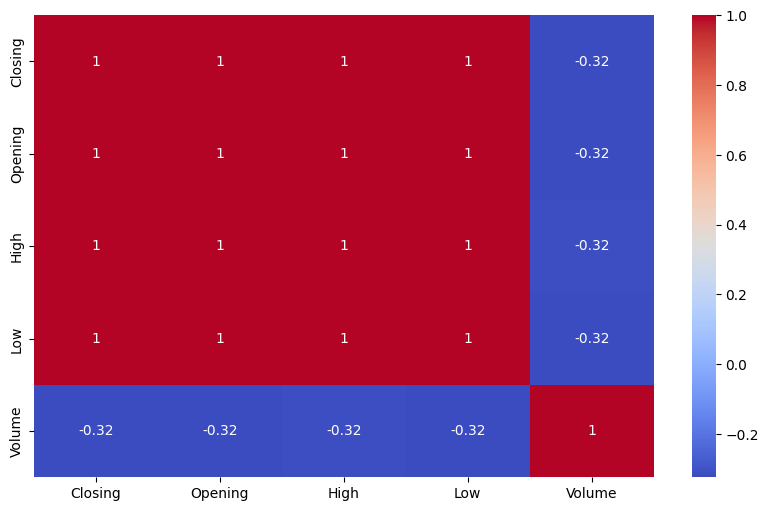

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data[['Closing', 'Opening', 'High', 'Low', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.show()


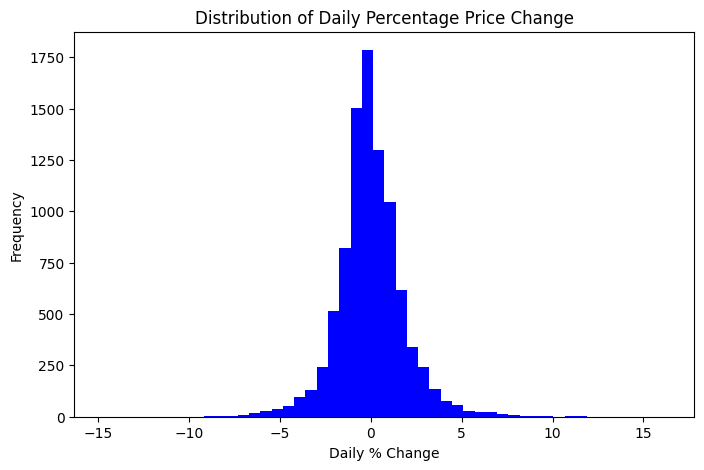

In [22]:
data['Change%'] = data['Change%'].str.replace('%','').astype(float)
plt.figure(figsize=(8, 5))
plt.hist(data['Change%'], bins=50, color='blue')
plt.title('Distribution of Daily Percentage Price Change')
plt.xlabel('Daily % Change')
plt.ylabel('Frequency')
plt.show()


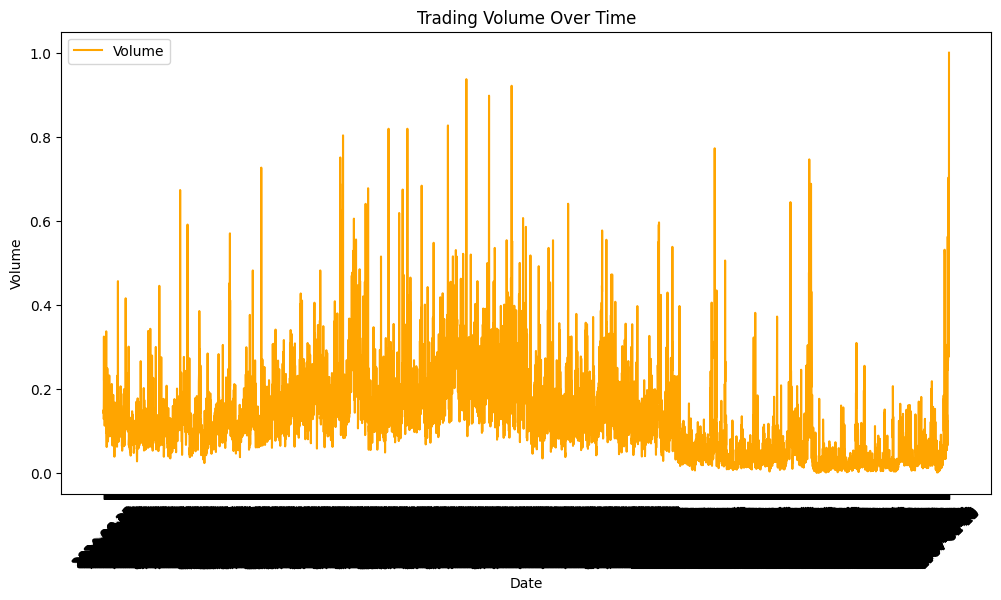

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], color='orange', label='Volume')
plt.xticks(rotation=45)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                    open=data['Opening'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Closing'])])

fig.update_layout(title='Candlestick Chart for Stock Prices', xaxis_title='Date', yaxis_title='Price')
fig.show()


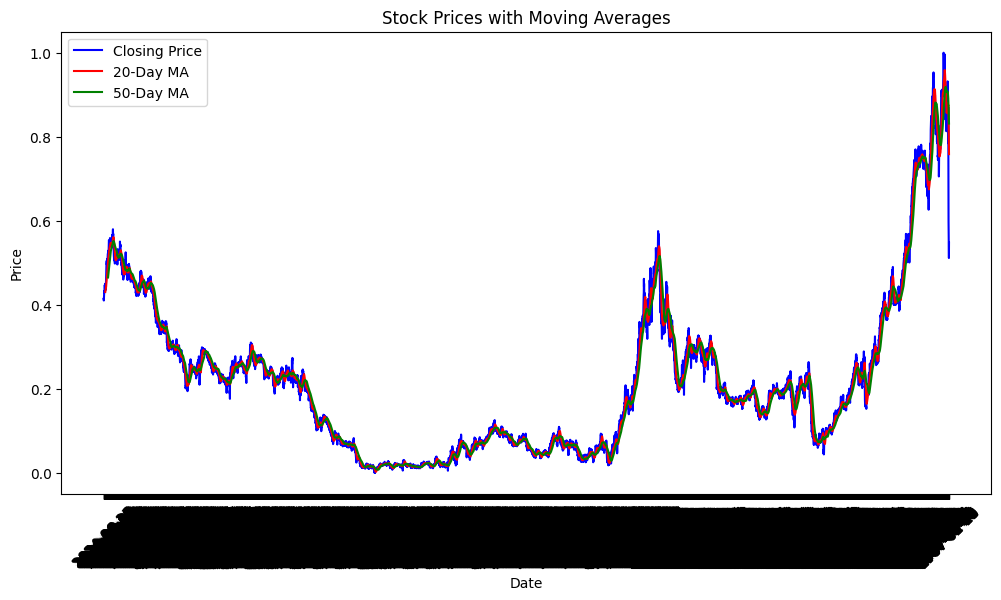

In [25]:
data['MA_20'] = data['Closing'].rolling(window=20).mean()
data['MA_50'] = data['Closing'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Closing'], label='Closing Price', color='blue')
plt.plot(data['Date'], data['MA_20'], label='20-Day MA', color='red')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', color='green')
plt.xticks(rotation=45)
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


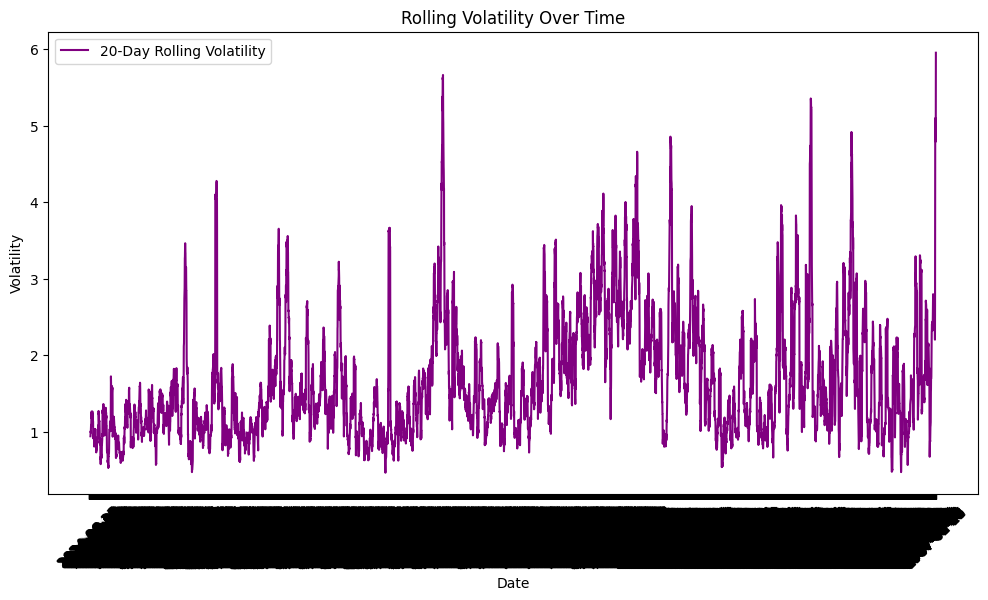

In [26]:
data['Volatility'] = data['Change%'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volatility'], label='20-Day Rolling Volatility', color='purple')
plt.xticks(rotation=45)
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


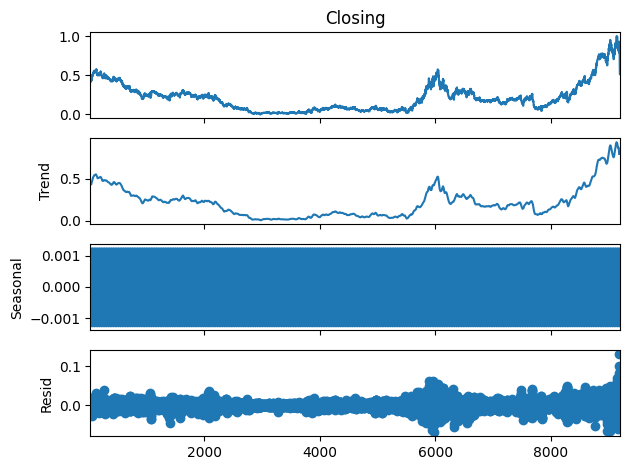

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Closing'], period=30)  # assuming daily data with a 30-day season
decomposition.plot()
plt.show()


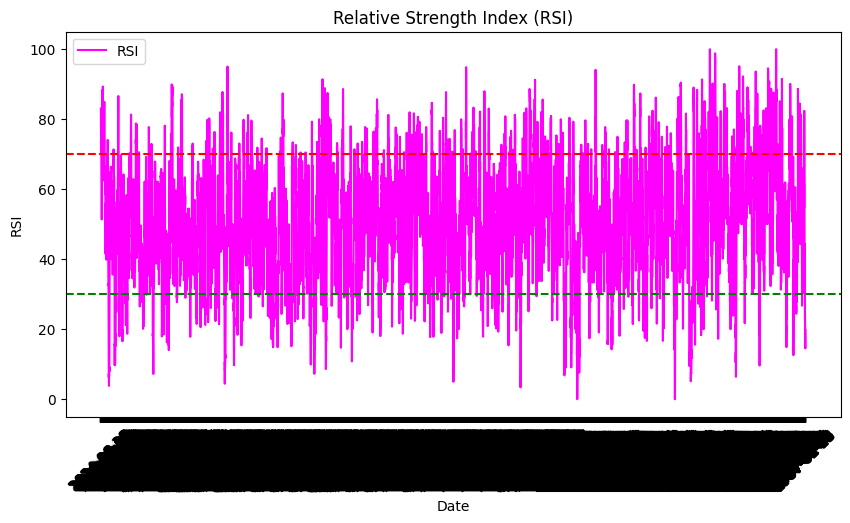

In [28]:
def RSI(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = RSI(data['Closing'], period=14)

plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['RSI'], label='RSI', color='magenta')
plt.axhline(70, linestyle='--', color='red')  # Overbought level
plt.axhline(30, linestyle='--', color='green')  # Oversold level
plt.xticks(rotation=45)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


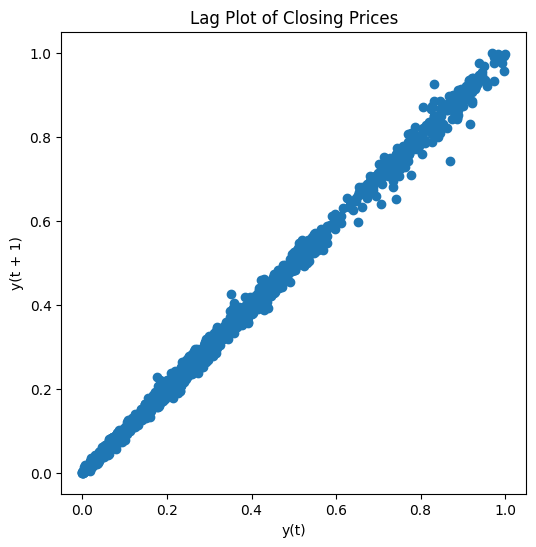

In [29]:
from pandas.plotting import lag_plot

plt.figure(figsize=(6, 6))
lag_plot(data['Closing'], lag=1)
plt.title('Lag Plot of Closing Prices')
plt.show()


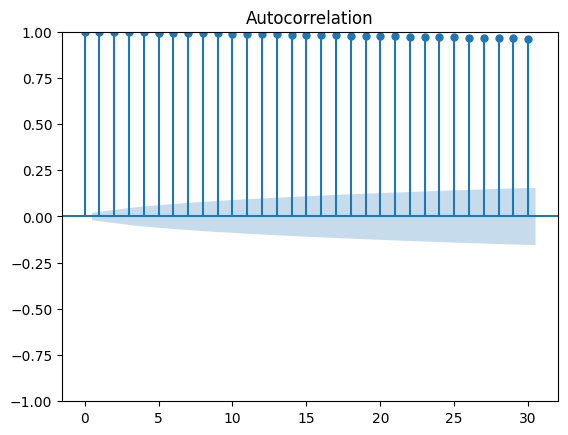

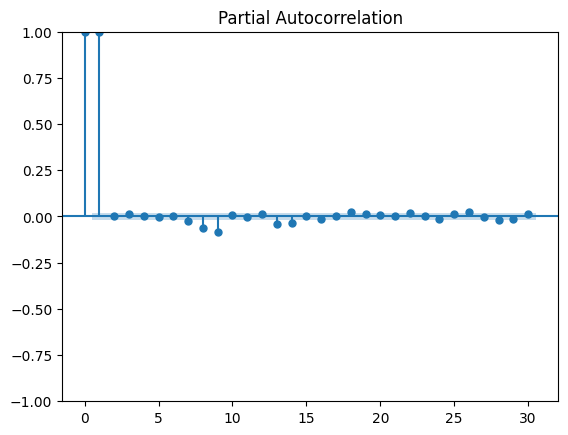

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Closing'], lags=30)
plot_pacf(data['Closing'], lags=30)
plt.show()


Visualizing the Data

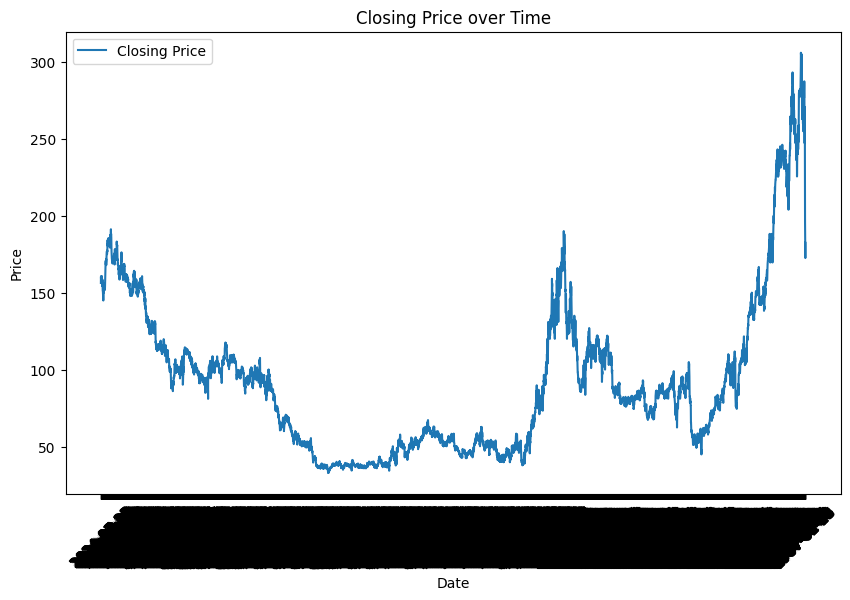

In [4]:
import matplotlib.pyplot as plt

# Plotting Closing price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Closing'], label='Closing Price')
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Checking Trends, Seasonality, and Outliers

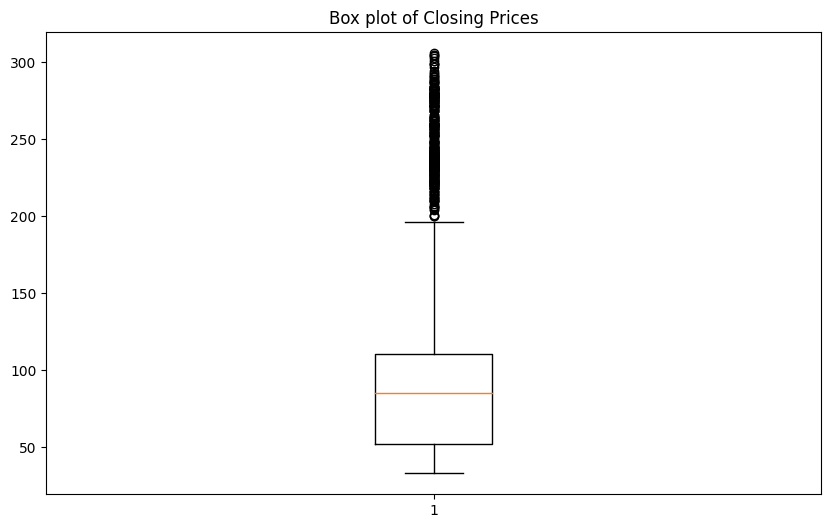

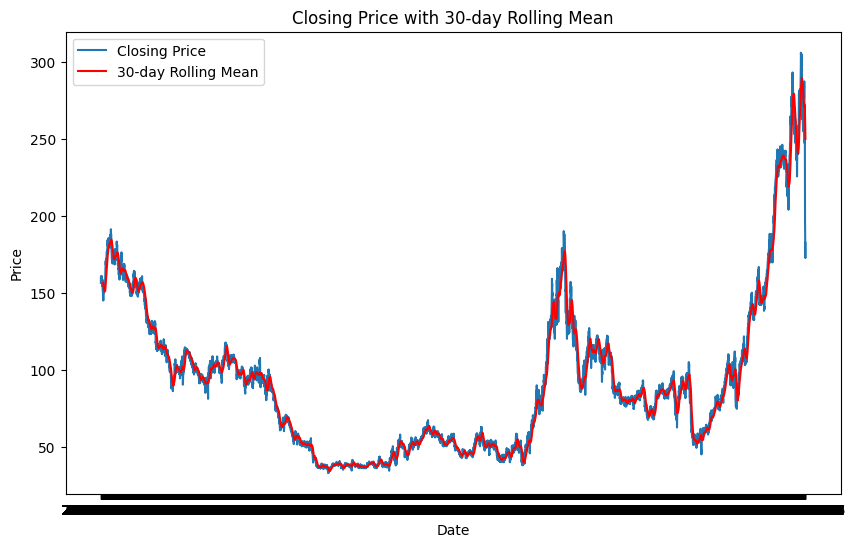

In [5]:
# Box plot for detecting outliers in the closing prices
plt.figure(figsize=(10, 6))
plt.boxplot(data['Closing'])
plt.title('Box plot of Closing Prices')
plt.show()

# Rolling Mean for Trend and Seasonality
data['Rolling_Mean_30'] = data['Closing'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Closing'], label='Closing Price')
plt.plot(data['Date'], data['Rolling_Mean_30'], color='red', label='30-day Rolling Mean')
plt.title('Closing Price with 30-day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
# Filling missing values using forward fill method
data.fillna(method='ffill', inplace=True)


<ipython-input-6-9a87dceadfc3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Feature Engineering (Lag Features and Moving Averages)

In [48]:
# Lag features: Closing price from the previous 7 days
for i in range(1, 8):
    data[f'Lag_{i}'] = data['Closing'].shift(i)

# Adding moving average features
data['MA_7'] = data['Closing'].rolling(window=7).mean()
data['MA_30'] = data['Closing'].rolling(window=30).mean()

# Dropping rows with NaN values created by lag features
data.dropna(inplace=True)


In [49]:
data.head()

,Date,Closing,Opening,High,Low,Volume,Change%,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,MA_7,MA_30
29,2024-06-20,146.0,145.7,146.6,145.3,174.17M,0.27%,147.0,149.4,150.9,151.3,151.3,151.8,156.2,149.671429,156.210000
30,2024-06-19,145.6,145.5,145.8,144.4,199.45M,0.07%,146.0,147.0,149.4,150.9,151.3,151.3,151.8,148.785714,155.853333
31,2024-06-18,145.5,144.0,146.4,144.0,188.53M,0.41%,145.6,146.0,147.0,149.4,150.9,151.3,151.3,147.957143,155.356667
32,2024-06-17,144.9,145.2,146.5,144.5,234.21M,-1.09%,145.5,145.6,146.0,147.0,149.4,150.9,151.3,147.042857,154.896667
33,2024-06-14,146.5,146.0,146.9,145.4,421.26M,-0.88%,144.9,145.5,145.6,146.0,147.0,149.4,150.9,146.414286,154.456667


Scaling Data (Normalization)

In [51]:
# Define a function to convert 'B', 'M', and 'K' in the Volume column to actual numbers
def convert_volume(value):
    value = value.strip()  # Remove any surrounding spaces
    if 'B' in value:
        return float(value.replace('B', '')) * 1e9  # Convert billions
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6  # Convert millions
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3  # Convert thousands
    else:
        return float(value)  # No suffix, just convert directly


In [52]:
# Apply the conversion function to the Volume column
data['Volume'] = data['Volume'].apply(convert_volume)

In [11]:
# Now apply the MinMaxScaler after converting the Volume column to numeric
from sklearn.preprocessing import MinMaxScaler

# Scaling closing prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Closing', 'Opening', 'High', 'Low', 'Volume']] = scaler.fit_transform(
    data[['Closing', 'Opening', 'High', 'Low', 'Volume']]
)

print(data.head())  # Check the scaled data


          Date   Closing   Opening      High       Low    Volume Change%  \
29  2024-06-20  0.414071  0.407153  0.407035  0.416268  0.129720   0.27%   
30  2024-06-19  0.412605  0.406431  0.404164  0.412955  0.149615   0.07%   
31  2024-06-18  0.412239  0.401012  0.406317  0.411483  0.141021   0.41%   
32  2024-06-17  0.410040  0.405347  0.406676  0.413324  0.176971  -1.09%   
33  2024-06-14  0.415903  0.408237  0.408112  0.416636  0.324178  -0.88%   

    Rolling_Mean_30  Lag_1  Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  \
29       156.210000  147.0  149.4  150.9  151.3  151.3  151.8  156.2   
30       155.853333  146.0  147.0  149.4  150.9  151.3  151.3  151.8   
31       155.356667  145.6  146.0  147.0  149.4  150.9  151.3  151.3   
32       154.896667  145.5  145.6  146.0  147.0  149.4  150.9  151.3   
33       154.456667  144.9  145.5  145.6  146.0  147.0  149.4  150.9   

          MA_7       MA_30  
29  149.671429  156.210000  
30  148.785714  155.853333  
31  147.957143  155.356

#3. Model Selection and Training

Model 1: ARIMA

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Preparing data for ARIMA
arima_data = data['Closing']

# Building ARIMA model (p=5, d=1, q=0) - these are placeholder parameters
model = ARIMA(arima_data, order=(5, 1, 0))
arima_model = model.fit()

# Forecast the next 30 days
forecast = arima_model.forecast(steps=30)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


9173    0.549914
9174    0.550460
9175    0.550481
9176    0.549771
9177    0.549057
9178    0.549003
9179    0.549021
9180    0.549052
9181    0.549082
9182    0.549095
9183    0.549095
9184    0.549093
9185    0.549091
9186    0.549090
9187    0.549090
9188    0.549090
9189    0.549090
9190    0.549090
9191    0.549090
9192    0.549090
9193    0.549090
9194    0.549090
9195    0.549090
9196    0.549090
9197    0.549090
9198    0.549090
9199    0.549090
9200    0.549090
9201    0.549090
9202    0.549090
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model 2: LSTM

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Reshaping the data to be 3D for LSTM input
X = data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']].values
y = data['Closing'].values

X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, time_steps, features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
predicted_stock_price = model.predict(X_test)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0422
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.2257e-04
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0242e-04
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.1814e-04
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 1.0014e-04
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 9.0139e-05
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 9.0753e-05
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.4562e-05
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 9.4073e-05
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 9.1476e-05
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


# 4. Model Evaluation and Result Analysis

ARIMA Evaluation

In [14]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for ARIMA
test_data = arima_data[-30:]  # last 30 days
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'ARIMA RMSE: {rmse}')


ARIMA RMSE: 0.28073905795649706


LSTM Evaluation

In [16]:
# Create a separate scaler for the Closing price
closing_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit this scaler only on the Closing price
data['Closing_scaled'] = closing_scaler.fit_transform(data[['Closing']])

# Now scale the predicted stock prices and test data
predicted_stock_price_rescaled = closing_scaler.inverse_transform(predicted_stock_price)
y_test_rescaled = closing_scaler.inverse_transform([y_test])

# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_rescaled[0], predicted_stock_price_rescaled))
print(f'LSTM RMSE: {rmse_lstm}')


LSTM RMSE: 0.06654564919238082


#5. Refinement and Model Retraining

ARIMA: Tweak p, d, and q parameters and retrain.

In [19]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")  # Ignore convergence warnings

# Define p, d, q values to test
p = range(0, 5)
d = range(0, 5)
q = range(0, 5)

# Generate all possible combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

best_score, best_cfg = float("inf"), None

for param in pdq:
    try:
        model = ARIMA(data['Closing'], order=param)
        model_fit = model.fit()
        y_pred = model_fit.forecast(steps=len(test_data))
        rmse = np.sqrt(mean_squared_error(test_data, y_pred))
        if rmse < best_score:
            best_score, best_cfg = rmse, param
        print(f'ARIMA{param} RMSE={rmse:.4f}')
    except:
        continue

print(f'Best ARIMA parameters: {best_cfg} with RMSE={best_score:.4f}')


ARIMA(0, 0, 0) RMSE=0.5945
ARIMA(0, 0, 1) RMSE=0.5885
ARIMA(0, 0, 2) RMSE=0.5895
ARIMA(0, 0, 3) RMSE=0.5692
ARIMA(0, 0, 4) RMSE=0.5917
ARIMA(0, 1, 0) RMSE=0.2823
ARIMA(0, 1, 1) RMSE=0.2817
ARIMA(0, 1, 2) RMSE=0.2822
ARIMA(0, 1, 3) RMSE=0.2821
ARIMA(0, 1, 4) RMSE=0.2812
ARIMA(0, 2, 0) RMSE=0.5284
ARIMA(0, 2, 1) RMSE=0.2846
ARIMA(0, 2, 2) RMSE=0.2840
ARIMA(0, 2, 3) RMSE=0.3578
ARIMA(0, 2, 4) RMSE=0.2913
ARIMA(0, 3, 0) RMSE=10.8317
ARIMA(0, 3, 1) RMSE=0.5420
ARIMA(0, 3, 2) RMSE=0.2857
ARIMA(0, 3, 3) RMSE=0.2844
ARIMA(0, 3, 4) RMSE=0.2789
ARIMA(0, 4, 0) RMSE=77.1087
ARIMA(0, 4, 1) RMSE=10.9283
ARIMA(0, 4, 2) RMSE=0.5482
ARIMA(0, 4, 3) RMSE=0.4805
ARIMA(0, 4, 4) RMSE=0.3594
ARIMA(1, 0, 0) RMSE=0.2846
ARIMA(1, 0, 1) RMSE=0.2840
ARIMA(1, 0, 2) RMSE=0.2844
ARIMA(1, 0, 3) RMSE=0.2843
ARIMA(1, 0, 4) RMSE=0.2833
ARIMA(1, 1, 0) RMSE=0.2817
ARIMA(1, 1, 1) RMSE=0.2817
ARIMA(1, 1, 2) RMSE=0.2552
ARIMA(1, 1, 3) RMSE=0.2776
ARIMA(1, 1, 4) RMSE=0.2553
ARIMA(1, 2, 0) RMSE=0.3053
ARIMA(1, 2, 1) RMSE=0.284

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Preparing data for ARIMA
arima_data = data['Closing']

# Building ARIMA model (p=2, d=2, q=0) - these are best placeholder parameters
model = ARIMA(arima_data, order=(2, 2, 0))
arima_model = model.fit()

# Forecast the next 30 days
forecast = arima_model.forecast(steps=30)
print(forecast)


9173    0.549008
9174    0.557131
9175    0.572463
9176    0.581061
9177    0.591575
9178    0.603079
9179    0.613326
9180    0.624047
9181    0.634879
9182    0.645484
9183    0.656198
9184    0.666917
9185    0.677597
9186    0.688300
9187    0.699001
9188    0.709696
9189    0.720395
9190    0.731094
9191    0.741791
9192    0.752490
9193    0.763188
9194    0.773886
9195    0.784584
9196    0.795283
9197    0.805981
9198    0.816679
9199    0.827377
9200    0.838076
9201    0.848774
9202    0.859472
Name: predicted_mean, dtype: float64


LSTM: Add dropout layers, change the number of LSTM units or layers, and retrain.

In [17]:
# Adding dropout to LSTM to improve performance
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0190
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0016
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 9.4403e-04
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.9180e-04
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.9673e-04
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.3264e-04
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4.8189e-04
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.0905e-04
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.0949e-04
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.9237e-04


#Other model testing

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [53]:
data.head()

,Date,Closing,Opening,High,Low,Volume,Change%,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,MA_7,MA_30
29,2024-06-20,146.0,145.7,146.6,145.3,174170000.0,0.27%,147.0,149.4,150.9,151.3,151.3,151.8,156.2,149.671429,156.210000
30,2024-06-19,145.6,145.5,145.8,144.4,199450000.0,0.07%,146.0,147.0,149.4,150.9,151.3,151.3,151.8,148.785714,155.853333
31,2024-06-18,145.5,144.0,146.4,144.0,188530000.0,0.41%,145.6,146.0,147.0,149.4,150.9,151.3,151.3,147.957143,155.356667
32,2024-06-17,144.9,145.2,146.5,144.5,234210000.0,-1.09%,145.5,145.6,146.0,147.0,149.4,150.9,151.3,147.042857,154.896667
33,2024-06-14,146.5,146.0,146.9,145.4,421260000.0,-0.88%,144.9,145.5,145.6,146.0,147.0,149.4,150.9,146.414286,154.456667


In [54]:
# Convert Change% to numeric (without the percentage sign)
data['Change%'] = data['Change%'].str.replace('%', '').astype(float)

# Set 'Date' as index if not needed as a feature
data.set_index('Date', inplace=True)

# Splitting the dataset into features and target
X = data.drop(columns=['Closing'])  # Drop target column
y = data['Closing']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# SVR Model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Calculate RMSE for SVR
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f'SVR RMSE: {rmse_svr:.4f}')

SVR RMSE: 49.0126


In [56]:
# Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)

# Calculate RMSE for Random Forest
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print(f'Random Forest RMSE: {rmse_rfr:.4f}')


Random Forest RMSE: 0.7592


In [57]:
# XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost RMSE: {rmse_xgb:.4f}')

XGBoost RMSE: 0.9364


In [58]:



# Now apply the MinMaxScaler after converting the Volume column to numeric
from sklearn.preprocessing import MinMaxScaler

# Scaling closing prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Closing', 'Opening', 'High', 'Low', 'Volume']] = scaler.fit_transform(
    data[['Closing', 'Opening', 'High', 'Low', 'Volume']]
)

print(data.head())  # Check the scaled data


             Closing   Opening      High       Low    Volume  Change%  Lag_1  \
Date                                                                           
2024-06-20  0.414071  0.407153  0.407035  0.416268  0.129720     0.27  147.0   
2024-06-19  0.412605  0.406431  0.404164  0.412955  0.149615     0.07  146.0   
2024-06-18  0.412239  0.401012  0.406317  0.411483  0.141021     0.41  145.6   
2024-06-17  0.410040  0.405347  0.406676  0.413324  0.176971    -1.09  145.5   
2024-06-14  0.415903  0.408237  0.408112  0.416636  0.324178    -0.88  144.9   

            Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7        MA_7       MA_30  
Date                                                                          
2024-06-20  149.4  150.9  151.3  151.3  151.8  156.2  149.671429  156.210000  
2024-06-19  147.0  149.4  150.9  151.3  151.3  151.8  148.785714  155.853333  
2024-06-18  146.0  147.0  149.4  150.9  151.3  151.3  147.957143  155.356667  
2024-06-17  145.6  146.0  147.0  149.4  150.

In [59]:
# SVR Model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Calculate RMSE for SVR
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f'SVR RMSE: {rmse_svr:.4f}')

SVR RMSE: 49.0126


In [60]:
# Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)

# Calculate RMSE for Random Forest
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print(f'Random Forest RMSE: {rmse_rfr:.4f}')


Random Forest RMSE: 0.7592


In [61]:
# XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost RMSE: {rmse_xgb:.4f}')

XGBoost RMSE: 0.9364
